In [1]:
import numpy as np
from scipy import stats
from sklearn.datasets import make_spd_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Sampling

#### univariate gaussian distribution
Xi ~ N(0,1)

Xi ~ mu + sigma*N(0,1)

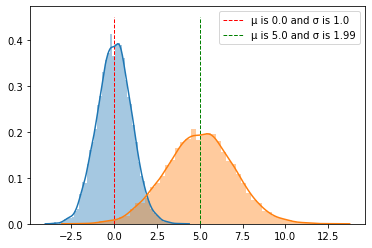

In [2]:
X0 = np.random.normal(loc=0, scale=1, size=10000)
μ_0, σ_0= stats.norm.fit(X0)
X1 = 5+2*X0
μ_1, σ_1= stats.norm.fit(X1)

sns.distplot(X0)
sns.distplot(X1)
s = "μ is {} and σ is {}".format(round(μ_0,2), round(σ_0, 2))
plt.vlines(μ_0, 0, 0.45, color="red", linestyles="--", lw=1, label=s)
s = "μ is {} and σ is {}".format(round(μ_1,2), round(σ_1, 2))
plt.vlines(μ_1, 0, 0.45, color="green", linestyles="--", lw=1, label=s)
plt.legend()
plt.show();

#### bivariate gaussian distribution

In [3]:
mean0 = np.zeros(2)
cov0 = np.identity(2)
XX0 = np.random.multivariate_normal(mean=mean0, cov=cov0, size=10000)
print(np.mean(XX0, axis=0))
print(np.cov(XX0, rowvar=0))

[-0.01499915  0.00212544]
[[1.00180873 0.00604559]
 [0.00604559 1.00109904]]


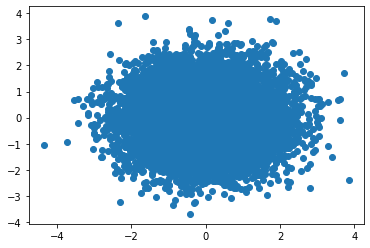

In [4]:
plt.scatter(XX0[:,0], XX0[:,1]);

sampling from multivariate gaussian distribution is 

XX ~ mu + transpose(cholesky(cov)) * N(zeros(), identity())

In [5]:
mean1 = np.array([1, 2])
cov1 = np.array([[1, 0.8],[0.8, 1]])
L1 = np.linalg.cholesky(cov1)
#np.dot(L1, np.linalg.inv(L1)) is a always identity matrix
#np.dot(L1, np.transpose(L1)) is alwayes a original matrix

In [6]:
XX1 = mean1 + np.dot(XX0,np.transpose(L1))
print(np.mean(XX1, axis=0))
print(np.cov(XX1, rowvar=0))

[0.98500085 1.98927594]
[[1.00180873 0.80507434]
 [0.80507434 1.00735701]]


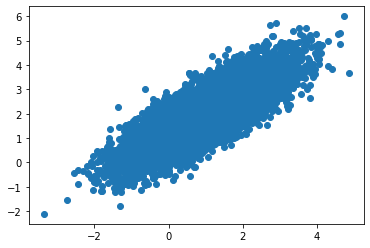

In [7]:
plt.scatter(XX1[:,0], XX1[:,1]);

# ploting

In [8]:
def plot_bivargauss(mean, cov):
    #Create grid and multivariate normal
    x = np.linspace(-5,5,500)
    y = np.linspace(-5,5,500)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y

    multigauss = stats.multivariate_normal(mean, cov)
    Z = multigauss.pdf(pos)
    rv = np.append(np.arange(1,3).reshape(-1,1), multigauss.rvs(1).reshape(-1,1), axis=1)

    fig, (ax1, ax2) = plt.subplots(ncols=2)
    ax1.contour(X, Y, Z,cmap='viridis',linewidth=0)
    ax1.scatter(rv[0,0],rv[1,1])

    ax2.plot(rv[:,0], rv[:,1])
    ax2.axis(xmin=0,xmax=5, ymin=-5, ymax=5)
    plt.show();

C:\Users\smrut\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  


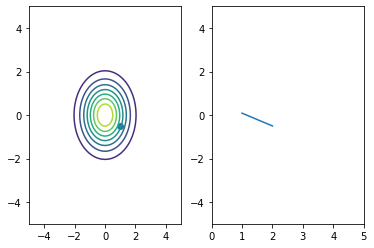

In [20]:
plot_bivargauss(mean0, cov0)

C:\Users\smrut\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  


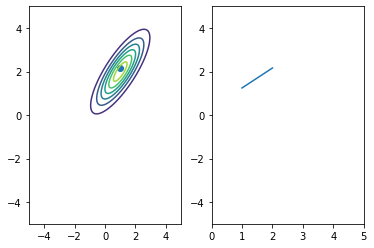

In [18]:
plot_bivargauss(mean1, cov1)

# sampling from multivariate gaussian distribution

In [74]:
mean = np.zeros(10)
cov = make_spd_matrix(n_dim=10, random_state=None)
multigauss = stats.multivariate_normal(mean, cov)

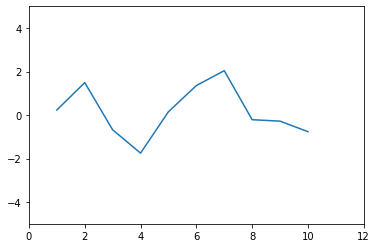

In [98]:
rv = np.append(np.arange(1,11).reshape(-1,1), multigauss.rvs(1).reshape(-1,1), axis=1)
plt.plot(rv[:,0], rv[:,1])
plt.axis(xmin=0,xmax=12, ymin=-5, ymax=5)
plt.show();

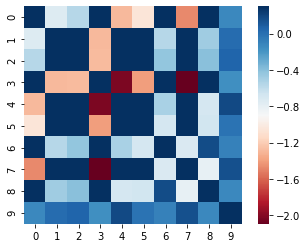

In [60]:
sns.heatmap(cov, vmax=.3, square=True,  cmap="RdBu")
plt.show()